In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('data_assignment.csv')
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


In [3]:
# CEAIRA'S CONTRIBUTION PART 1: Q1 to Q5
# =======================================

In [4]:
#Describe datset

df.nunique()

Id                   149999
Title                 92115
Company               26318
Date                     44
Location                 65
Area                     19
Classification           30
SubClassification       338
Requirement          121324
FullDescription      127676
LowestSalary             11
HighestSalary            11
JobType                   4
dtype: int64

In [5]:
#How many records are there in the dataset

df.shape

(149999, 13)

In [6]:
#Describe datset

df.columns

Index(['Id', 'Title', 'Company', 'Date', 'Location', 'Area', 'Classification',
       'SubClassification', 'Requirement', 'FullDescription', 'LowestSalary',
       'HighestSalary', 'JobType'],
      dtype='object')

In [7]:
#Describe datset

df.dtypes

Id                    int64
Title                object
Company              object
Date                 object
Location             object
Area                 object
Classification       object
SubClassification    object
Requirement          object
FullDescription      object
LowestSalary          int64
HighestSalary         int64
JobType              object
dtype: object

In [8]:
#Correct date format

df["Date"] = df["Date"].replace(to_replace=r'T.*', value='', regex = True)
df["Date"] = pd.to_datetime (df["Date"])

In [9]:
#Describe datset with correct date format

df.dtypes

Id                            int64
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
dtype: object

In [10]:
df.sort_values(by='Date')

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
22645,37362027,Principal SharePoint Consultant,PBI Search,2018-10-01,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Consultants,"Work as Principal Consultant, leading and deli...",<div>This award-winning Consultancy and MS Gol...,150,200,Full Time
22746,37360134,Application Developer - IBM IIB,Compas Pty Ltd,2018-10-01,ACT,NaN,Information & Communication Technology,Developers/Programmers,Compas is seeking an experienced Application D...,Are you an <strong>Application Developer </str...,150,200,Contract/Temp
22747,37360123,Technical Consultant - Mainframe and ITSM,Sharp & Carter Digital and Technology,2018-10-01,Melbourne,NaN,Information & Communication Technology,Computer Operators,We are looking for several contractors for a 6...,<br>Technical Consultant &nbsp;- Mainframe &am...,150,200,Contract/Temp
22748,37360095,Level 3 Systems Engineer,Continuum Recruitment,2018-10-01,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Networks & Systems Administration,Engineer Level 3 | Sydney | 8 Month Contract |...,<strong>Level 3 Systems Engineer.<br></strong>...,150,200,Contract/Temp
22749,37360082,DevOps Engineer,Viiew Pty Ltd,2018-10-01,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Developers/Programmers,We are looking for talented and enthusiastic S...,<p><strong><br>About VIIEW<br><br></strong>Vii...,150,200,Contract/Temp
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149346,37710161,Primary Teachers Wanted,Frontline Education Sydney,2018-11-13,Sydney,"CBD, Inner West & Eastern Suburbs",Education & Training,Teaching - Primary,Currently seeking Casual Primary Teachers for ...,<p><strong>How we can help:</strong></p>\n ...,0,30,Casual/Vacation
149347,37710160,Broker Support Consultant,Employ,2018-11-13,Sydney,"CBD, Inner West & Eastern Suburbs",Banking & Financial Services,Client Services,Varied role to support Brokers who are having ...,<div>\n <div>Working for a strong bra...,0,30,Full Time
149348,37710158,Physiotherapist - Private Practice,Ivory Group,2018-11-13,Sydney,North West & Hills District,Healthcare & Medical,"Physiotherapy, OT & Rehabilitation",Join an established private practice in Sydney...,"<p style=""text-align:justify;""><strong>ABOUT T...",0,30,Full Time
149350,37710156,Big Data Analytics Engineer (Data Science Team),TRS - IT & Communications,2018-11-13,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Consultants,Huge Data Sets require a Data Scientist to per...,Our customer has access (hosts) some of the la...,0,30,Full Time


In [11]:
#Which period does it cover? How many different dates have job postings?

df.sort_values(by='Date')
df["Date"].value_counts()

2018-10-17    13059
2018-10-31     8641
2018-10-04     8506
2018-10-10     8337
2018-10-30     8179
2018-10-18     8121
2018-11-05     7778
2018-11-07     6947
2018-10-09     6329
2018-10-16     6267
2018-10-19     5989
2018-11-12     5865
2018-10-05     5711
2018-10-15     5210
2018-10-08     4995
2018-10-03     4945
2018-10-29     4656
2018-11-06     3654
2018-11-09     3377
2018-11-02     2874
2018-10-02     1980
2018-10-26     1701
2018-10-12     1324
2018-11-01     1316
2018-10-11     1221
2018-10-25     1205
2018-11-08     1199
2018-10-21     1145
2018-10-07     1037
2018-10-01     1023
2018-11-13      986
2018-10-24      835
2018-10-23      827
2018-11-10      743
2018-10-22      688
2018-11-04      636
2018-11-03      499
2018-10-06      471
2018-10-20      422
2018-11-11      343
2018-10-28      291
2018-10-14      239
2018-10-27      232
2018-10-13      196
Name: Date, dtype: int64

In [12]:
#How many job sectors (job classifications) are there in the dataset? List the name of each sector and its' total of job postings

df["Classification"].value_counts()

Information & Communication Technology    16661
Trades & Services                         14125
Healthcare & Medical                      12515
Hospitality & Tourism                     11818
Manufacturing, Transport & Logistics       9608
Administration & Office Support            7636
Accounting                                 7075
Education & Training                       7033
Retail & Consumer Products                 6496
Sales                                      6281
Construction                               6254
Government & Defence                       5926
Engineering                                4812
Mining, Resources & Energy                 4679
Community Services & Development           3528
Banking & Financial Services               3481
Human Resources & Recruitment              3233
Call Centre & Customer Service             3127
Legal                                      3071
Marketing & Communications                 3052
Real Estate & Property                  

In [13]:
# SUSANA'S CONTRIBUTION PART 1: Q6 to Q10
# =======================================

# read the csv file into Dataframe: df, and check data is read ok
df = pd.read_csv('data_assignment.csv')
print("The Dataset consists of: ", df.shape[0], " rows and ", df.shape[1], " columuns")
df.head(3)

The Dataset consists of:  149999  rows and  13  columuns


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN


In [14]:
# Choose job sector, how many sub-sectors are there in that sector? 
# I tried using Unique function, but couldn't make it work:  np.unique(sector, trim='fb')[source]

# Chose the Accounting Sector, create new dataset
sub_classification = df[df['Classification'] == "Accounting" ].groupby(['Classification','SubClassification'])
sub_classification['Classification'].value_counts()
print('There are',len(sub_classification), 'sub sectors within Accounting')

There are 25 sub sectors within Accounting


In [15]:
# List the names of each sub-sector and it's job posting total
print('Sub Sectors and total job posting numbers:')
df[df['Classification'] == "Accounting" ]['SubClassification'].value_counts()

Sub Sectors and total job posting numbers:


Financial Accounting & Reporting           919
Business Services & Corporate Advisory     805
Accounts Officers/Clerks                   711
Financial Managers & Controllers           674
Payroll                                    530
Accounts Receivable/Credit Control         461
Taxation                                   411
Management Accounting & Budgeting          410
Accounts Payable                           398
Analysis & Reporting                       389
Assistant Accountants                      337
Bookkeeping & Small Practice Accounting    255
Audit - External                           126
Audit - Internal                           121
Other                                      106
Management                                 100
Strategy & Planning                         59
Compliance & Risk                           58
Systems Accounting & IT Audit               49
Treasury                                    44
Insolvency & Corporate Recovery             37
Cost Accounti

In [16]:
# List the salary ranges and their total of job postings
# read and set salary ranges from numbers to strings
df['SalaryRange'] = df['LowestSalary'].astype(str) + ' - ' + df['HighestSalary'].astype(str)
df.SalaryRange.value_counts()

0 - 30       27606
40 - 50      17708
60 - 70      14108
100 - 120    13062
70 - 80      12932
80 - 100     12582
50 - 60      12559
30 - 40      12441
150 - 200    11738
120 - 150    10651
200 - 250     4612
Name: SalaryRange, dtype: int64

In [17]:
#Q1.8 List the job types, in each job type, what are the lowest and highest salary?
df_jobtype1 = df.groupby('JobType').agg({'LowestSalary':'min', 'HighestSalary':'max'})[['LowestSalary','HighestSalary']].reset_index()
print(df_jobtype1.head())

           JobType  LowestSalary  HighestSalary
0  Casual/Vacation             0            250
1    Contract/Temp             0            250
2        Full Time             0            250
3        Part Time             0            250


In [18]:
# Q2.1 The salaries are set as HighestSalary and LowestSalary, calc AverageSalary for each job.
# calculate average salary
df["AverageSalary"] = (df["LowestSalary"]+df["HighestSalary"])/2

print(df[['Title', 'AverageSalary']])


                                                    Title  AverageSalary
0                                Casual Stock Replenisher           15.0
1                                Casual Stock Replenisher           15.0
2       RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...           15.0
3                                   Team member - Belrose           15.0
4       Business Banking Contact Centre Specialist, Ni...           15.0
...                                                   ...            ...
149994                           Dance Studio Coordinator           15.0
149995                                 Geology Technician           15.0
149996                         Lead Product Manager UX/UI           15.0
149997                             Junior Primary Teacher           15.0
149998                                  Network Engineer            15.0

[149999 rows x 2 columns]


In [19]:
# HANH'S CONTRIBUTION PART 1: Q11 to Q14
# =======================================

In [20]:
#The raw dataset values of the "Id" column had inconsistencies in their representation. The Id values should have 8 number long integers only. Write code to remove unnecessary characters.
df['IdLen'] = df['Id'].astype(str).map(len)
df[df['IdLen'] != 8].shape[0]
print("All the Id length are 8")

All the Id length are 8


In [21]:
# The "Date" column is represented in a format that contained both date and time information. However, the time is not correct and should be removed. (1 point)
df['Date'] = df["Date"].replace(to_replace=r'T.*',value='',regex=True)

In [22]:
df.dtypes

Id                     int64
Title                 object
Company               object
Date                  object
Location              object
Area                  object
Classification        object
SubClassification     object
Requirement           object
FullDescription       object
LowestSalary           int64
HighestSalary          int64
JobType               object
SalaryRange           object
AverageSalary        float64
IdLen                  int64
dtype: object

In [23]:
# Change type of “Id” column to numeric and change type of “Date” column to DateTime. (1 point)
df['Date'] = pd.to_datetime(df['Date'])
df['Id'] =  pd.to_numeric(df['Id'])

In [24]:
df.dtypes

Id                            int64
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
SalaryRange                  object
AverageSalary               float64
IdLen                         int64
dtype: object

In [25]:
# Are there any duplicate data in the dataset? Provide the way you find them and your solution to fix it.
df[df.duplicated(subset=df.columns.difference(['Id']))].shape[0] 


611

In [26]:
# Solution to fix duplicate data
df.drop_duplicates(subset=df.columns.difference(['Id']), inplace = True) 

In [27]:
# Check duplicate again
df[df.duplicated(subset=df.columns.difference(['Id']))].shape[0] 

0

In [28]:
# Check missing data and visualize them in a corresponding chart.** (1.5 point)

# Check missing data
df.isnull().sum(axis = 0)



Id                       0
Title                    0
Company               5760
Date                     0
Location                 0
Area                 56232
Classification           0
SubClassification        0
Requirement              0
FullDescription       3264
LowestSalary             0
HighestSalary            0
JobType               3215
SalaryRange              0
AverageSalary            0
IdLen                    0
dtype: int64

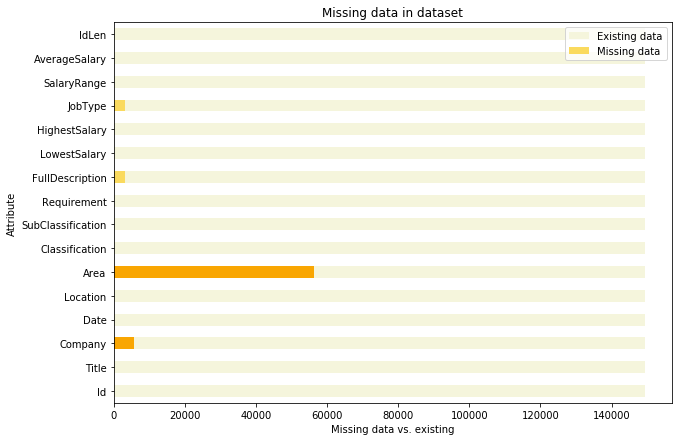

In [29]:
# Visualise missing data using Plot

colors1 = ["#F5F5DC"]
fig, ax = plt.subplots(figsize=(10,7))  
ax.set_title("Missing data in dataset");
ax.set_xlabel("Missing data vs. existing")

# Plot 1 Existing data 
df_2 = df.notnull().count(axis = 0)
df_2 = df_2.reset_index()
df_2.columns=['Attribute1', 'Existing data']
df_2.plot.barh(x='Attribute1',y='Existing data', ax=ax, stacked=True, color=colors1)

# Plot 2 Missing data 
colors2 = ["#FADA5E", "#FFD300","#F9A602"]
df_1 = df.isnull().sum(axis = 0)
df_1 = df_1.reset_index()
df_1.columns=['Attribute', 'Missing data']
df_1.plot.barh(x='Attribute',y='Missing data', ax=ax, stacked=True, color=colors2)


In [30]:
# PART 2

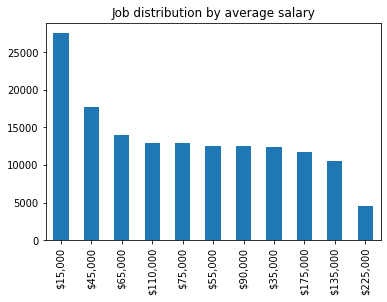

In [31]:
# Get the salary ranges using "AverageSalary", the total jobs of each range and display them in the bar chart(1 point)
#df['AverageSalary'] = df[['LowestSalary', 'HighestSalary']].mean(axis=1)
# Format with commas and round off to two decimal places in pandas 
df['AverageSalary'] = ('$' + (df[['LowestSalary', 'HighestSalary']].mean(axis=1)).astype(str)).replace('\.0', ',000', regex=True)
job_counts = df['AverageSalary'].value_counts()
plt.title('Job distribution by average salary')
job_counts.plot(kind='bar')

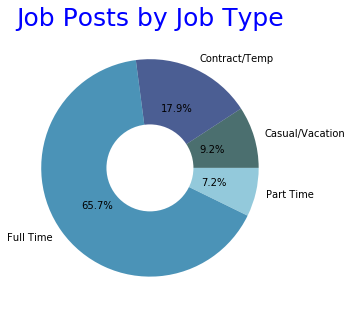

In [32]:
# Display the list of job types and the number of jobs of each type using pie chart.

df = pd.read_csv('data_assignment.csv')
df.head(3)

#create dataframe for jobtypes and calculate the totals
df_jobtype = df[df['JobType'].isna()==False]
df_jobtype = df_jobtype.groupby(['JobType']).count()
df_jobtype['Label'] = df_jobtype.index
df_jobtype['Count'] = df_jobtype["Id"] 

# plot job type and format pie chart
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(df_jobtype['Count'], colors=sns.color_palette("ocean", len(df_jobtype)),labels=df_jobtype['Label'],wedgeprops={'alpha':0.7},autopct='%.1f%%')
ax.set_title('Job Posts by Job Type', size=25, color='blue', loc='center')

# add centre circle to make donut chart
centre_circle = plt.Circle((0,0),0.4, fc='white')
ax.add_patch(centre_circle)

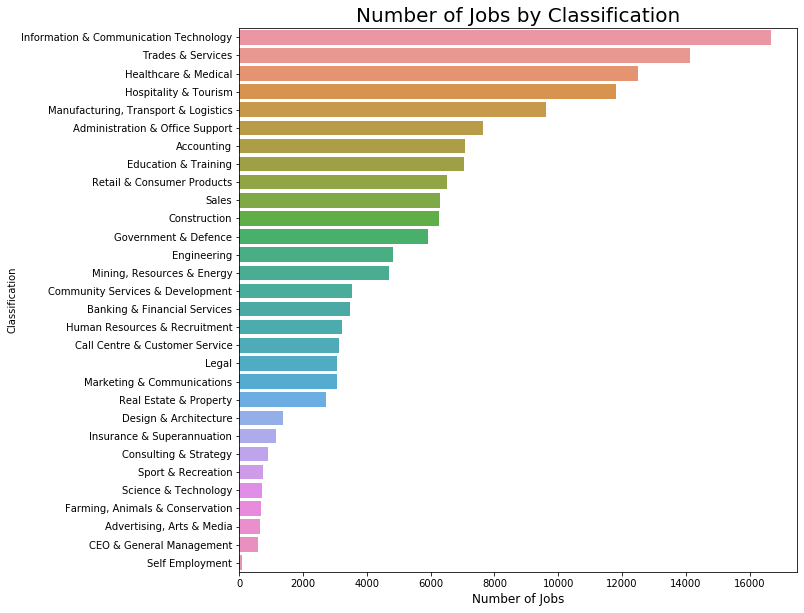

In [33]:
# Display the list of job sectors and the number of jobs of each type using horizontal bar chart
# Set figure
plt.figure(figsize=(10,10))

# Plot bar chart
sns.countplot(y='Classification',data=df, order=df.Classification.value_counts().index)

# Set title and labels
plt.title('Number of Jobs by Classification', size=20)
plt.xlabel('Number of Jobs', size=12)
plt.show()

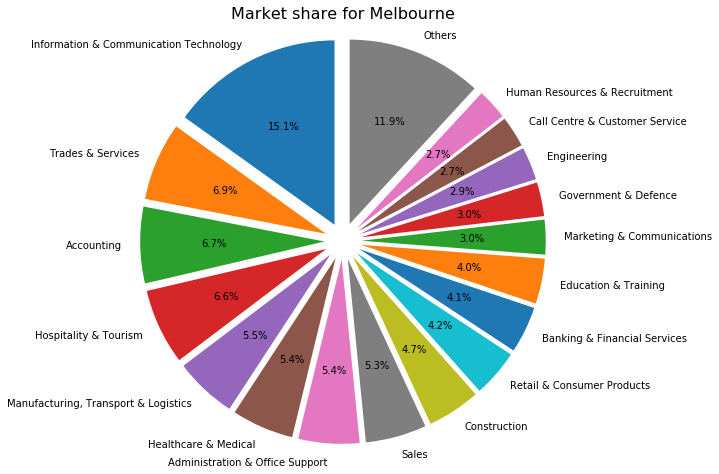

In [34]:
# Choose your favorite location. Visualize the market share of that location in pie chart. (1 point)
#sizes
fig1, ax1 = plt.subplots(figsize=(8, 8))

# "explode" the 2nd slice (i.e. 'Hogs')
explode = [0.1] * 18

classificationDf = df[(df['Location'].isna()==False) & (df['Location'] == "Sydney")]
classificationDf = classificationDf.groupby('Classification').count()
classificationDf['Classification'] = classificationDf.index
classificationDf['Count'] = classificationDf["Id"]

# Pie char for job market share of cities
from matplotlib import cm
classificationDf = classificationDf.sort_values(by=["Count"], ascending =False)

# Get the top 17 classifications
classificationTop18Df = classificationDf[:17].copy()

# others 
new_row = pd.DataFrame(data = {
    'Classification' : ['Others'],
    'Count' : [classificationDf["Count"][17:].sum()]
})

# Add 17 top classifications with others
classificationTop18Df = pd.concat([classificationTop18Df, new_row],sort=False)
classificationTop18Df.index = classificationTop18Df['Classification']

# Pie chart
plt.pie( classificationTop18Df["Count"], labels=classificationTop18Df["Classification"], autopct='%1.1f%%', startangle=90, explode=explode)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Market share for Melbourne',size=16,loc='center')
plt.ylabel('')
plt.show()

Text(3.6750000000000043, 0.5, 'Highest Salary')

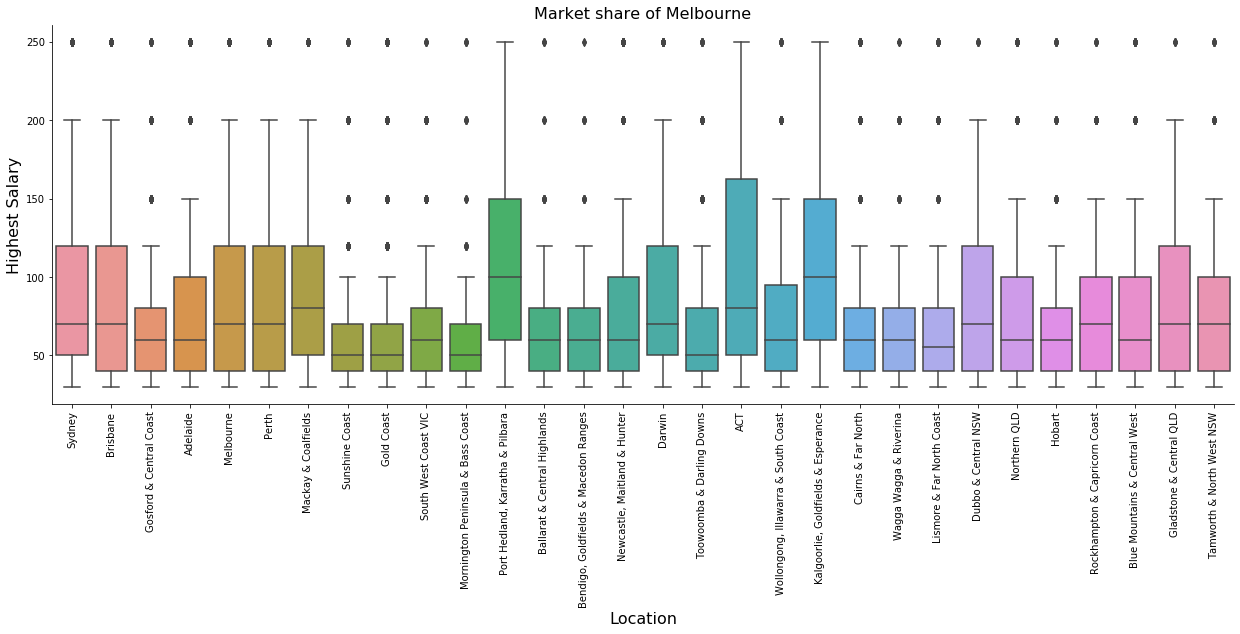

In [35]:
# Can you find the salary distribution for the top 30 cities for the number of job postings? Visualize them in the boxplot chart. (1 point)

# Get the top 30 cities who have the most number of job postings
locationDf2 = df[df['Location'].isna()==False]
locationDf2 = locationDf2.groupby('Location').count()
locationDf2['Location'] = locationDf2.index
locationDf2['Count'] = locationDf2["Id"]
locationDf2 = locationDf2.sort_values(by=["Count"], ascending =False)
locationTop30Df = locationDf2[:30].copy()


df_top30 = df[(df['Location'].isna()==False) & (df['Location'].isin(locationTop30Df['Location']).astype(int))]

ax = sns.catplot(x="Location", y="HighestSalary", data = df_top30, kind="box", height=6, aspect=3)
ax.set_xticklabels(rotation=90)
plt.title('Market share of Melbourne',size=16,loc='center')
plt.xlabel('Location',size=16)
plt.ylabel('Highest Salary',size=16)
